# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Felipe Hernández
- Nombre de alumno 2: Brandon Peña

### **Link de repositorio de GitHub:** [enlace](https://github.com/brandonHaipas/MDS7202-Lab-Prog-Ciencia-de-Datos/tree/main/Lab%201%20-%20Git)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento son aquellos que se utilizan para ajustar los parámetros del modelo, mientras que los de validación son un conjunto (disjunto al de entrenamiento) que se emplea para evaluar el modelo con observaciones distintas a las utilizadas en su ajuste.

2. El principal desafío es el tener que construir etiquetas que permitan clasificar los datos. En estos casos, el mejor enfoque es realizar una segmentación no supervisada, por ejemplo, con clustering.

3. Las matrices de confusiones comparan las clases reales y predichas por un modelo de clasificación sobre un determinado conjunto de datos, generalmente el de prueba. Se utiliza para observar si el modeo está clasificando correctamente, o bien, está "confundiendo" una clase por otra.

4.
 - Accuracy ($\frac{TP + TN}{TP + TN + FP + FN}$): Corresponde a la fracción de predicciones realizadas correctamente.
 - Precision ($\frac{TP}{TP + FP}$): Corresponde a la fracción de predicciones positivas realizadas correctamente. Indica qué tan bien el modelo es capaz de detectar los verdaderos positivos, y no cometer falsos positivos.
 - Recall ($\frac{TP}{TP + FN}$): Indica qué tan bien el modelo está clasificando la clase positiva. Es importante para detectar si se cometen falsos negativos.
 - F1 score ($\frac{2 \cdot Precision \cdot Recall \cdot}{Precision + Recall}$): Corresponde a la media armónica entre Precision y Recall, por lo que mide de forma simétrica ambas métricas.

5.
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: Recall, porque una máquina que va a fallar y no se detecta puede ser costosa.
  * Detección de enfermedades altamente contagiosas: Recall, porque el costo de cometer falsos negativos es alto, es una persona enferma que no se detecta.
  * Aprobación de créditos de alto riesgo: Precision, pues un falso positivo es aprobar un crédito a alguien que no se debía.
  * Detección de crímenes: F1 score, pues tanto Precision como Recall son importantes y se busca un equilibrio. Un falso positivo puede llevar a prisión a un inocente, pero un falso negativo puede dejar a un criminal en libertad.
6. La calibración de modelos es el proceso mediante el cual se ajustan los modelos para que las probabilidades de predicción se ajusten a las del mundo real, es decir, de la data observada. Se usa mejorar las predicciones de los modelos, permitiendo que las probabilidades predichas por estos puedan interpretarse como frecuencias a largo plazo.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

In [25]:
!pip install pycaret[full]

In [26]:
# Read dataset
import pandas as pd

stats_df = pd.read_csv('stats_players.csv')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [27]:
# 1. Generación de labels
stats_df['label'] = stats_df['National_Position'].apply(lambda x: 0 if pd.isna(x) else 1)

# 2. Conteo por clase
stats_df['label'].value_counts()

,count
label,
0,16513
1,1075


2. Se observa que las clases están fuertemente desbalanceadas. La clase negativa (0) es más de 15 veces mayor que la clase positiva 1. Esto puede generar que el modelo se sesgue a predecir la clase negativa.

In [ ]:
# 3. Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

numeric_columns = [c for c in stats_df.select_dtypes(include='number') if c not in ['label', 'Weak_foot', 'Skill_Moves']]
categorical_columns = ['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']
normal_columns = ['Height', 'Weight', 'Age', 'Reactions', 'Volleys']


col_transformer = ColumnTransformer([
    ('Standard', StandardScaler(), normal_columns),
    ('MinMax', MinMaxScaler(), [c for c in numeric_columns if c not in normal_columns]),
    ('OneHot', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), categorical_columns),
])

4. En base a lo observado en `Player_Stats_Report.html`, las transformaciones elegidas fueron:
- `StandardScaler`, usado para escalar aquellos datos que tenían una distribución visualmente cercana a una normal. El escalado es necesario pues los datos se encuentran en distintas magnitudes, y algunos modelos pueden verse afectados por esto.
- `MinMaxScaler`, para datos que no se encuentran con una distribución normal.
- `OneHotEncoder`, para vectorizar variables categóricas y poder trabajar con ellas en un espacio matemático.

No fue necesario emplear un imputer, pues los datos no contienen nulos. Respecto a las variables numéricas, no se observó presencia de outliers en los gráficos de distribuciones, luego no se utilizó un `RobustScaler`.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [ ]:
# 1. Definición de conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = stats_df.drop(columns=['label'])
y = stats_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=99)

In [ ]:
# 2-3. Definición de pipelines y entrenamiento
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

pipeline_xgboost = Pipeline([('ct', col_transformer), ('xgboost', XGBClassifier())])
pipeline_lightgbm = Pipeline([('ct', col_transformer), ('lightgbm', LGBMClassifier(verbose=-1))])

pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('Standard',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Height', 'Weight', 'Age',
                                                   'Reactions', 'Volleys']),
                                                 ('MinMax',
                                                  MinMaxScaler(clip=False,
                                                               copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['Ball_Control', 'Dribbling',...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0,
                                verbose=-1))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [ ]:
# 1. Cálculo de métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

print(f'Métricas para XGBClassifier\n---\nAccuracy: {accuracy_score(y_pred_xgboost, y_test)}\nPrecision: {precision_score(y_pred_xgboost, y_test)}\nRecall (Positive class): {recall_score(y_pred_xgboost, y_test)}\nClassification Report\n{classification_report(y_pred_xgboost, y_test)}')
print(f'Métricas para LGBMClassifier\n---\nAccuracy: {accuracy_score(y_pred_lightgbm, y_test)}\nPrecision: {precision_score(y_pred_lightgbm, y_test)}\nRecall (Positive class): {recall_score(y_pred_lightgbm, y_test)}\nClassification Report\n{classification_report(y_pred_lightgbm, y_test)}')

Métricas para XGBClassifier
---
Accuracy: 0.9479190357061633
Precision: 0.3308550185873606
Recall (Positive class): 0.644927536231884
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4259
           1       0.33      0.64      0.44       138

    accuracy                           0.95      4397
   macro avg       0.66      0.80      0.71      4397
weighted avg       0.97      0.95      0.96      4397

Métricas para LGBMClassifier
---
Accuracy: 0.9504207414146009
Precision: 0.3382899628252788
Recall (Positive class): 0.6946564885496184
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4266
           1       0.34      0.69      0.46       131

    accuracy                           0.95      4397
   macro avg       0.66      0.83      0.71      4397
weighted avg       0.97      0.95      0.96      4397



2. Las métricas de accuracy indican una buena predicción de la clase real, no obstante la métrica de precision muestra que la clase positiva se clasifica correctamente en un tercio de las veces. Esto tiene sentido, pues la clase negativa esta en una mucho mayor proporción, y el modelo debe estar sobre ajustado a esta. La métrica de recall de 0.69 respalda esto, pues muestra que una fracción importante (0.31) de falsos negativos, es decir, positivos que el modelo sesgadamente clasificó como negativos.

3. La métrica más adecuada para el caso nos parece recall, pues queremos evitar que un jugador sea falsamente clasificado como de selección nacional. Respecto a esta, LGBMClassifier es un mejor modelo, pero aún así tiene un bajo precision.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
# 1. Definición de label
positions_dict = {
    'GK': 'arquero',
    'RB': 'defensa',
    'CB': 'defensa',
    'LB': 'defensa',
    'RWB': 'central_defensa',
    'CDM': 'central_defensa',
    'LWB': 'central_defensa',
    'RM': 'central',
    'CM': 'central',
    'LM': 'central',
    'RW': 'central_ataque',
    'CAM': 'central_ataque',
    'LW': 'central_ataque',
    'ST': 'ataque',
    'CF': 'ataque'
}

positions_df = stats_df.copy()
positions_df = positions_df[positions_df['Club_Position'].isin(list(positions_dict.keys()))]
positions_df['label'] = positions_df['Club_Position'].apply(lambda x: positions_dict[x])

# 2. Conteo por clase
positions_df['label'].value_counts()

,count
label,
defensa,1180
central,907
arquero,632
central_ataque,581
ataque,430
central_defensa,209


In [ ]:
# 3. Entrenamiento y evaluación
from sklearn.svm import SVC

numeric_columns = [c for c in stats_df.select_dtypes(include='number') if c not in ['label', 'Weak_foot', 'Skill_Moves']]
categorical_columns = ['Nationality', 'National_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']
normal_columns = ['Height', 'Weight', 'Age', 'Reactions', 'Volleys']

col_transformer = ColumnTransformer([
    ('Standard', StandardScaler(), normal_columns),
    ('MinMax', MinMaxScaler(), [c for c in numeric_columns if c not in normal_columns]),
    ('OneHot', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), categorical_columns),
])

pipeline_svc = Pipeline([('ct', col_transformer), ('svc', SVC())])

labels = positions_df['label'].unique().tolist()
X = positions_df.drop(columns=['label'])
y = positions_df['label'].apply(lambda x: labels.index(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=99)

pipeline_svc.fit(X_train, y_train)

y_pred = pipeline_svc.predict(X_test)

print(f'Métricas para SVC\n---\n{classification_report(y_pred, y_test, target_names=labels)}')

Métricas para SVC
---
                 precision    recall  f1-score   support

 central_ataque       0.17      0.44      0.24        55
         ataque       0.82      0.81      0.82       110
        arquero       1.00      1.00      1.00       158
        defensa       0.97      0.76      0.85       375
        central       0.71      0.56      0.63       287
central_defensa       0.00      0.00      0.00         0

       accuracy                           0.73       985
      macro avg       0.61      0.59      0.59       985
   weighted avg       0.84      0.73      0.77       985



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4.

Se utiliza el clasificador SVC según la guía.

El modelo está evidentemente sobreajustado, para las clases mayoritarias, donde, por ejemplo, defensa y arquero tienen buenas predicciones, pero central_defensa no alcanza a obtener una.

La clase con mejores predicciones es la de arquero, siendo estas con métricas perfectas, mientras que las peores son de central_defensa, con 0 para cada score.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [28]:
# 1. Comparación
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Setup PyCaret
clf = setup(stats_df.drop(columns=['Name', 'National_Position']), target='label')

# Comparación
best = compare_models(sort = 'Precision', include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'])

,Description,Value
0,Session id,2683
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(17588, 46)"
5,Transformed train set shape,"(12311, 46)"
6,Transformed test set shape,"(5277, 46)"
7,Numeric features,33
8,Categorical features,4
9,Rows with missing values,0.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9443,0.9419,0.1276,0.7593,0.2163,0.2027,0.2939,2.2240
lightgbm,Light Gradient Boosting Machine,0.9534,0.9561,0.4536,0.6751,0.5415,0.5180,0.5299,1.3810
rf,Random Forest Classifier,0.9462,0.9404,0.2408,0.6611,0.3517,0.3302,0.3772,2.4760
catboost,CatBoost Classifier,0.9506,0.9538,0.4269,0.6437,0.5118,0.4871,0.4992,11.7710
xgboost,Extreme Gradient Boosting,0.9505,0.9554,0.4350,0.6377,0.5165,0.4915,0.5018,0.5690
dt,Decision Tree Classifier,0.9292,0.7025,0.4442,0.4282,0.4339,0.3964,0.3976,0.4940


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

2.
  - `dt`: Corresponde a un DecisionTreeClassifier. Implementa un árbol de decision sencillo a partir del dataset. Funciona escogiendo splits sobre las features del dataset que maximicen alguna métrica, como la ganancia de información o de gini, para así segmentar el dataset hasta llegar a nodos hoja que entregan una clasificación.
 - `et`: Corresponde a un ExtraTreeClassifier. Consiste en una ajuste randomizado de varios decision trees sobre el dataset, donde los splits se eligen de forma aleatoria y luego se obtiene una clasificación promedio entre todos los decision tree.
 - `rf`: Corresponde a un RandomForestClassifier. Implementa el algoritmo de Random Forest, que consiste en un modelo ensamblado al igual que ExtraTreeClassifier, pero utiliza bagging para la construcción de cada decision tree.

In [34]:
# 3. Evaluación del mejor modelo
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

3.   
  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos? **R:** La tasa de verdaderos positivos es considerablemente alta, siendo de 0.74. Además, la tasa de verdaderos negativos tiene un comportamiento mejor aún, siendo de 0.94.
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones? El umbral podría ser mayor, para estar más a la derecha, que es donde se intersectan precision y recall y donde se maximiza el f1 score.
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto? **R:** La variable más importante es la nacionalidad, seguido de características como reacciones, pase corto y control de balón. Esto puede deberse a que la nacionalidad es un factor importante para saber si el jugador es seleccionado (quizás en paises más pequeños o con menos jugadores), mientras que las características de juego deben determinar qué tan bueno es el jugador, y por lo tanto su capacidad de ser seleccionado.
  - **Learning Curve**: ¿El modelo presenta algún problema? Cómo las curva de entrenamiento es muy buena (practicamente constante en 1), pero la de cross validation es muy mala, el modelo está evidentemente sobreajustado.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [ ]:
# 1. Entrenamiento del modelo
numeric_columns = [c for c in stats_df.select_dtypes(include='number') if c not in ['label', 'Weak_foot', 'Skill_Moves']]
categorical_columns = ['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']
normal_columns = ['Height', 'Weight', 'Age', 'Reactions', 'Volleys']


col_transformer = ColumnTransformer([
    ('Standard', StandardScaler(), normal_columns),
    ('MinMax', MinMaxScaler(), [c for c in numeric_columns if c not in normal_columns]),
    ('OneHot', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), categorical_columns),
])

X = stats_df.drop(columns=['label'])
y = stats_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=99)

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(f'Métricas para XGBoost\n---\n{classification_report(y_pred, y_test)}')

Métricas para XGBoost
---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4259
           1       0.33      0.64      0.44       138

    accuracy                           0.95      4397
   macro avg       0.66      0.80      0.71      4397
weighted avg       0.97      0.95      0.96      4397



In [ ]:
# 2. Clasificar columnas por importancia de forma descendente
feature_names = col_transformer.get_feature_names_out().tolist()

importances = xgb.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [ ]:
# 3. Búsqueda recursiva de eliminación de características
from sklearn.model_selection import cross_val_score

precision_scores = []

# Iterar sobre las características y evaluar el modelo con cada adición
for i in range(1, len(feature_names)):
    # Eliminar las últimas i características
    selected_features = feature_importances_df[:-i]['feature'].tolist()

    # Índices de las columnas seleccionadas
    selected_indices = [feature_names.index(x) for x in feature_names if x in selected_features]

    scores = cross_val_score(
        xgb, X_train[:, selected_indices],
        y_train, cv=5, scoring='precision'
    )
    # Almacenar la precisión del modelo con i características
    precision_scores.append(scores)

In [ ]:
# 4. Entrenar modelo con mejor conjunto de características
import numpy as np

max_N = np.argmax([x.mean() for x in precision_scores]) + 1

# Eliminar las últimas i características
selected_features = feature_importances_df[:-max_N]['feature'].tolist()

# Índices de las columnas seleccionadas
selected_indices = [feature_names.index(x) for x in feature_names if x in selected_features]

X_train_reduced = X_train[:, selected_indices]
X_test_reduced = X_test[:, selected_indices]

xgb = XGBClassifier()
xgb.fit(X_train_reduced, y_train)
y_pred = xgb.predict(X_test_reduced)

print(f'Métricas para XGBoost con {X_train.shape[1] - max_N} features más importantes\n---\n{classification_report(y_pred, y_test)}')

Métricas para XGBoost con 101 features más importantes
---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4260
           1       0.32      0.64      0.43       137

    accuracy                           0.95      4397
   macro avg       0.66      0.80      0.70      4397
weighted avg       0.97      0.95      0.96      4397



 5.
  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? **R:** El rendimiento es muy similar al del modelo original. En terminos de precision y recall, precision sólo varía y en una centésima, siendo mayor en el caso original. No obstante, cabe destacar que el modelo con características seleccionadas tiene más de 100 columnas menos.
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. **R:** El modelo se vuelve más sencillo de entrenar y de ejecutar para realizar predicciones, dado que son menos las decisiones que se evalúan. Además, al utilizar menos variables, existe menos probabilidad de que este se sobreajuste por alguna en particular, luego tiene mejores capacidades de generalización a datos no observados.
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. **R:** El modelo con menor dimensionalidad es más sencillo de explicar, pues las decisiones que se toman para llegar a una clasificación se simplifican. Luego, es más fácil explicar qué variables son las importantes para tomar determinadas decisiones, y luego, llevar a una clasificación particular.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [ ]:
# 1. Calibración
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

# Calculamos Brier Score Loss antes de calibrar
y_prob_uncalibrated = xgb.predict_proba(X_test_reduced)[:, 1]  # Probabilidades de la clase positiva
brier_uncalibrated = brier_score_loss(y_test, y_prob_uncalibrated)
print(f"Brier Score (sin calibrar): {brier_uncalibrated:.4f}")

# Hacemos un Wrap sobre el modelo
calibrated = CalibratedClassifierCV(xgb, method='isotonic', cv=3)
# Definimos procedimiento de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
# Evaluamos
estimator = cross_validate(
    calibrated, X_test_reduced, y_test,
    scoring='roc_auc', cv=cv, n_jobs=-1,
    return_estimator=True
)

# Brier Score Loss con modelo calibrado
calibrated.fit(X_train_reduced, y_train)

y_prob_calibrated = calibrated.predict_proba(X_test_reduced)[:, 1]
brier_calibrated = brier_score_loss(y_test, y_prob_calibrated)
print(f"Brier Score (calibrado): {brier_calibrated:.4f}")

Brier Score (sin calibrar): 0.0377
Brier Score (calibrado): 0.0360


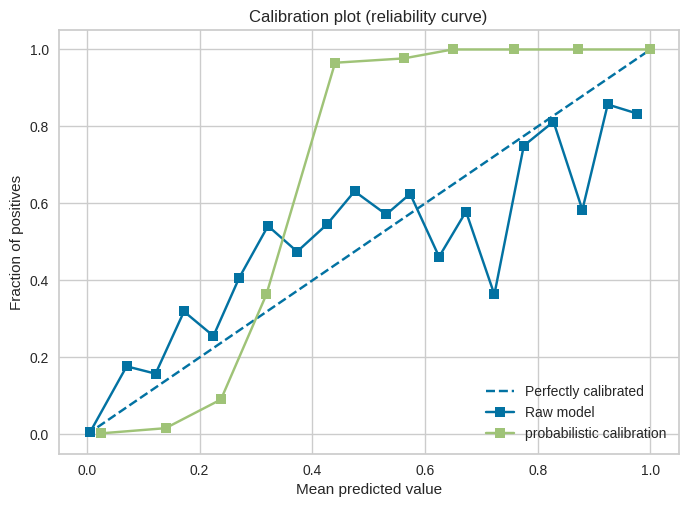

In [ ]:
# 2. Comparación visual
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Definimos figura para hacer el plot
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

# Graficamos el primer modelo raw
prob_pos_dt = xgb.predict_proba(X_test_reduced)[:, 1]
fraction_of_positives_dt, mean_predicted_value_dt = calibration_curve(y_test, prob_pos_dt, n_bins=20)
ax.plot(
    mean_predicted_value_dt,
    fraction_of_positives_dt, "s-", label="%s" % ('Raw model')
)

# Graficamos el modelo calibrado
prob_pos_cc = estimator['estimator'][0].predict_proba(X_test_reduced)[:, 1]
fraction_of_positives_cc, mean_predicted_value_cc = calibration_curve(y_test, prob_pos_cc, n_bins=10)
ax.plot(mean_predicted_value_cc, fraction_of_positives_cc, "s-", label="%s" % ('probabilistic calibration'))

ax.legend(loc="lower right")
fig.show()

2. El Brier score disminuye levemente al calibrar el modelo, lo que implica que la diferencia entre las probabilidades de predicción y el output efectivo están más cerca, luego, mejora.

Al observar la visualización, se aprecia que el modelo calibrado no es perfecto. Más aún, el modelo original no posee predicciones muy malas para valores inferiores a 0.6, sin embargo, sobre estos comienzan a tener una pendiente negativa y oscilante. Es aquí donde el modelo calibrado aparenta tener un mejor comportamiento, más cercano a la perfección.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>